In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('messi.db')
cursor = conn.cursor()

In [3]:
# # 3. ეს კოდი ბაზაში პოულობს მესის ყველაზე შედეგიან სეზონს, და იმ სეზონში გატანილი გოლების რაოდენობას

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('messi.db')
cursor = conn.cursor()

query = """
SELECT season, SUM([Goals scored]) , COUNT(*)
FROM messi_barca
GROUP BY season
"""

cursor.execute(query)
results = cursor.fetchall()

max_goals = 0
best_season = None
matches = 0

for row in results:
    season, goals, match_count = row
    if goals > max_goals:
        max_goals = goals
        best_season = season
        matches = match_count

if best_season:
    print(f"ყველაზე შედეგიანი სეზონი: {best_season}")
    print(f"ჯამურად გატანილი გოლები: {max_goals}")
    print(f"ჩემპიონატების რაოდენობა: {matches}")
else:
    print("მონაცემები ვერ მოიძებნა.")


ყველაზე შედეგიანი სეზონი: 2016-2017
ჯამურად გატანილი გოლები: 88
ჩემპიონატების რაოდენობა: 4


In [6]:
# 4.ეს კოდი მომხმარებლისგან ითხოვს თამაშის დეტალურ ინფორმაციას. შემდეგ INSERT ბრძანებით ამატებს ახალ row-ს messi_barca ცხრილში.
# season = input("შეიყვანე სეზონი (მაგ. 2021-22): ")
# age = int(input("შეიყვანე ასაკი: "))
# competition = input("შეიყვანე ჩემპიონატი (მაგ. La Liga): ")
# matches_played = int(input("შეიყვანე ჩატარებული მატჩების რაოდენობა: "))
# starts = int(input("შეიყვანე რამდენჯერ დაიწყო ძირითადში: "))
# minutes_played = int(input("შეიყვანე ნათამაშები წუთები: "))
# goals_scored = int(input("შეიყვანე გატანილი გოლების რაოდენობა: "))

# query = """
# INSERT INTO messi_barca (Season, Age, Competition, [Matches Played], Starts, [Minutes played], [Goals scored])
# VALUES (?, ?, ?, ?, ?, ?, ?)
# """

# cursor.execute(query, (season, age, competition, matches_played, starts, minutes_played, goals_scored))
# conn.commit()

In [1]:
# 5მომხმარებელი ირჩევს კონკრეტულ სეზონს და ჩემპიონატს.შემდეგ შეჰყავს ახალი მნიშვნელობები: გოლები, წუთები, ასაკი და მატჩები.
# season = input("შეიყვანე სეზონი (მაგ. 2016-17): ")
# competition = input("შეიყვანე ჩემპიონატის სახელი (მაგ. Champions League): ")

# new_goals = int(input("შეიყვანე ახალი გატანილი გოლების რაოდენობა: "))
# new_minutes = int(input("შეიყვანე ახალი წუთების რაოდენობა: "))
# new_age = int(input("შეიყვანე ასაკი: "))
# new_matches = int(input("შეიყვანე ჩატარებული მატჩების რაოდენობა: "))

# query = """
# UPDATE messi_barca
# SET [Goals scored] = ?, [Minutes played] = ?, Age = ?, [Matches Played] = ?
# WHERE Season = ? AND Competition = ?
# """

# cursor.execute(query, (new_goals, new_minutes, new_age, new_matches, season, competition))

# conn.commit()

In [ ]:
# 6 მომხმარებელს შეყავს რომელი სეზონის და ჩემპიონატის ჩანაწერი სურს წაშალოს
season = input("შეიყვანე სეზონი, რომლის ჩანაწერის წაშლა გინდა (მაგ. 2014-15): ")
competition = input("შეიყვანე ჩემპიონატის სახელი (მაგ. La Liga): ")

query = """
DELETE FROM messi_barca
WHERE Season = ? AND Competition = ?
"""

cursor.execute(query, (season, competition))
conn.commit()

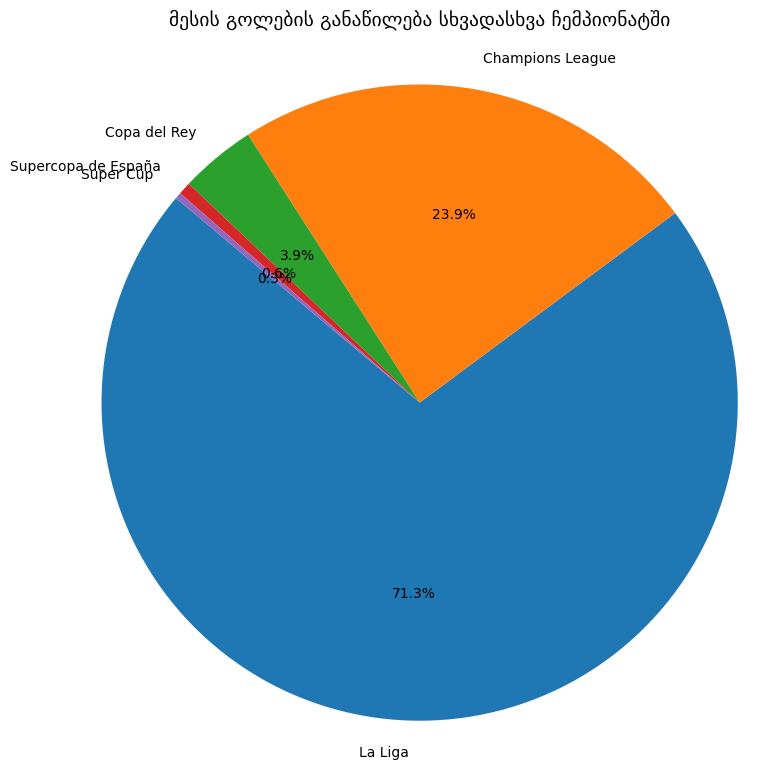

In [9]:
# 7

# ეს დიაგრამა აჩვენებს მესის გოლების გადანაწილებას სხვადასხვა ჩემპიონატებში
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect("messi.db")
cursor = conn.cursor()

query = """
SELECT Competition, SUM(CAST([Goals scored] AS INTEGER)) AS total_goals
FROM messi_barca
WHERE [Goals scored] IS NOT NULL
GROUP BY Competition
ORDER BY total_goals DESC
"""

cursor.execute(query)
results = cursor.fetchall()
conn.close()

competitions = [row[0] for row in results]
goals = [row[1] for row in results]

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(goals, labels=competitions, autopct='%1.1f%%', startangle=140)

ax.set_title("მესის გოლების განაწილება სხვადასხვა ჩემპიონატში", fontsize=14)

ax.axis('equal')

plt.tight_layout()
plt.show()

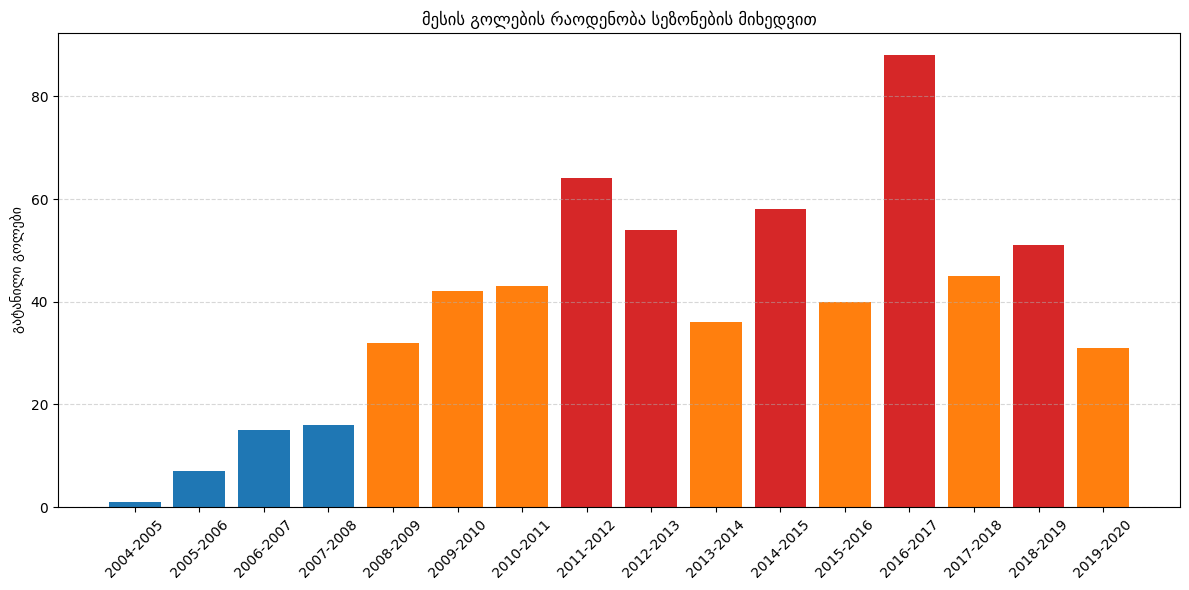

In [10]:
#მესის გოლების რაოდენობა სეზონების მიხედვით
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect("messi.db")
cursor = conn.cursor()

query = """
SELECT TRIM(Season), SUM(CAST([Goals scored] AS INTEGER)) AS total_goals
FROM messi_barca
WHERE [Goals scored] IS NOT NULL
GROUP BY TRIM(Season)
ORDER BY TRIM(Season)
"""

cursor.execute(query)
results = cursor.fetchall()
conn.close()

seasons = [row[0] for row in results]
goals = [row[1] for row in results]

colors = ['tab:blue' if g < 30 else 'tab:orange' if g < 50 else 'tab:red' for g in goals]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(seasons, goals, color=colors)

ax.set_ylabel('გატანილი გოლები')
ax.set_title('მესის გოლების რაოდენობა სეზონების მიხედვით')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.show()

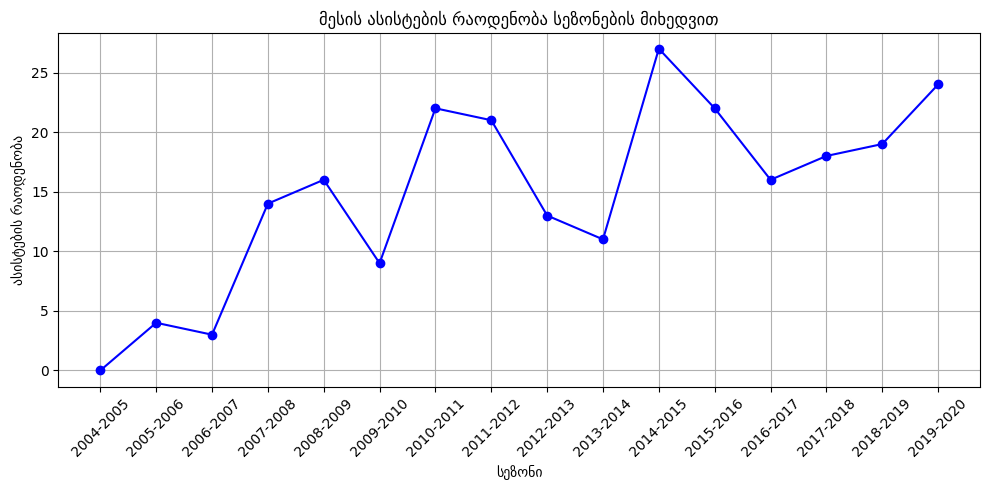

In [11]:
#მესის ასისტების რაოდენობა სეზონების მიხედვით


import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect("messi.db")
cursor = conn.cursor()

query = """
SELECT Season, SUM(CAST([Assists] AS INTEGER)) AS total_assists
FROM messi_barca
WHERE [Assists] IS NOT NULL
GROUP BY Season
ORDER BY Season
"""

cursor.execute(query)
results = cursor.fetchall()
conn.close()

seasons = [row[0] for row in results]
assists = [row[1] for row in results]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(seasons, assists, marker='o', linestyle='-', color='blue')

ax.set(xlabel='სეზონი', ylabel='ასისტების რაოდენობა',
       title='მესის ასისტების რაოდენობა სეზონების მიხედვით')
ax.grid(True)

plt.xticks(rotation=45)

fig.savefig("messi_assists_by_season.png", bbox_inches='tight')

plt.tight_layout()
plt.show()